# Check hint effects on homework

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pickle as pkl
import pandas as pd
from pandas import DataFrame
from collections import defaultdict
import scipy.stats as stats
import numpy as np

## Load Data

In [2]:
hw_df = pd.read_pickle('../data/pkl_data/hw_data.pkl')
cols = hw_df.columns
problem_list = list(set([(c[0],c[1]) for c in cols if len(c)==3]))
hw_df.head(3)

,"(2, 10, 1)","(2, 10, 2)","(2, 10, 3)","(2, 10, 4)","(2, 11, 1)","(2, 11, 2)","(2, 12, 1)","(2, 12, 2)","(2, 12, 3)","(2, 12, 4)",...,"(8, 3, 1)","(8, 3, 2)","(8, 3, 3)","(8, 3, 4)","(8, 4, 1)","(8, 4, 2)","(8, 4, 3)","(8, 5, 1)","(8, 5, 2)","(8, 6, 1)"
ID,,,,,,,,,,,,,,,,,,,,,
247,"[[2016-10-04 01:07:43, 1/12, 1, null]]","[[2016-10-04 01:07:43, 5/6, 1, null]]","[[2016-10-04 01:07:43, 1/12, 1, null]]","[[2016-10-04 01:07:43, 1, 1, null]]","[[2016-10-04 01:08:00, 4, 1, null]]","[[2016-10-04 01:08:00, 1/13, 1, null]]","[[2016-10-04 01:11:02, 1024, 1, null], [2016-1...","[[2016-10-04 01:11:02, 1/1024, 1, null], [2016...","[[2016-10-04 01:11:02, 10, 1, null], [2016-10-...","[[2016-10-04 01:11:02, 1/512, 0, null], [2016-...",...,"[[2016-11-17 01:10:21, 400, 0, 400/64], [2016-...","[[2016-11-17 01:19:27, (e^(-400/81))*((400/81)...","[[2016-11-17 01:19:27, (e^(-400/81))*((400/81)...","[[2016-11-17 00:22:58, 1-e^(-150), Please fin...","[[2016-11-17 02:01:33, 1/10, 1, 80.0*1/800.0],...","[[2016-11-17 02:01:33, (e^-(1/10))*((1/10)^2/(...","[[2016-11-17 02:01:33, 1-e^(-(1/10)*(1/10)), 0...","[[2016-11-17 02:22:33, (1/6.5)e^(-6.5*9), 0, e...","[[2016-11-17 03:20:07, e^(-(10/5.5))*(((10/5.5...","[[2016-11-17 02:33:13, e^(-2.1), 0, ((1/2) * e..."
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[[2016-11-18 02:11:56, 400/81, 1, 400/81], [20...","[[2016-11-18 02:11:56, (e^(-400/81))*((400/81)...","[[2016-11-18 02:11:56, (e^(-400/81))*((400/81)...","[[2016-11-18 02:29:26, 1-e^((-400/64) *(1/24) ...","[[2016-11-18 02:19:18, 0.1, 1, 100.0*1/1000.0]...","[[2016-11-18 02:19:18, 1/100, 0, e^{(-.1)}*(.1...","[[2016-11-18 02:19:18, .9, 0, e^{(-100.0/1000....","[[2016-11-18 02:52:49, e^(-11/6), 1, e^{(-1/6....",NaN,"[[2016-11-18 02:41:50, e^(-1.1) * .5 + e^(-3.8..."
109,"[[2016-10-04 09:28:48, 1/16, 1, null]]","[[2016-10-04 09:28:48, 6/16, 1, null]]","[[2016-10-04 09:28:48, 9/16, 1, null]]","[[2016-10-04 09:28:48, 16/16, 1, null]]","[[2016-10-04 09:29:21, 4, 1, null]]","[[2016-10-04 09:29:21, 4/52, 1, null]]","[[2016-10-04 09:40:23, 2^10, 1, null]]","[[2016-10-04 09:40:23, 1/(2^10), 1, null]]","[[2016-10-04 09:40:23, 10!/9!, 1, null]]","[[2016-10-04 09:40:23, 10!/(9!*2^10), 1, null]]",...,"[[2016-11-18 03:40:04, 400/64, 1, 400/64]]","[[2016-11-18 03:40:04, (e^(-400/64)) * (400/64...","[[2016-11-18 03:40:04, 64 * ((e^(-400/64)) * (...","[[2016-11-18 03:40:04, 1-e^((-400/64)*(2/24)),...","[[2016-11-18 03:51:31, 90.0/900.0, 1, 90.0*1/9...","[[2016-11-18 03:51:31, e^(-90.0/900.0) * (90.0...","[[2016-11-18 03:51:31, 1 - e^((90.0/900.0) * 1...","[[2016-11-18 05:35:29, 1-(1-e^(-10/6.5)), 1, e...","[[2016-11-18 05:46:54, e^(-5) * 5^4/4!, 0, e^{...","[[2016-11-18 06:09:47, ((e^-4.8) + (e^-1.2))/2..."


In [3]:
assign_df = pd.read_pickle('../data/pkl_data/hint_assignment.pkl')
assign_df.head(3)

,ID,WEEK4,WEEK5,WEEK6,WEEK7,WEEK8,WEEK9,WEEK10
ID,,,,,,,,
75,75,1,0,1,0,1,0,0
233,233,0,1,1,0,1,1,0
134,134,0,1,1,0,1,1,0


In [4]:
features_df = pd.read_pickle('../data/pkl_data/features_df.pkl')
features_df.head(3)

,group,"(tries, 2, 10, 1)","(tries, 2, 10, 2)","(tries, 2, 10, 3)","(tries, 2, 10, 4)","(tries, 2, 11, 1)","(tries, 2, 11, 2)","(tries, 2, 12, 1)","(tries, 2, 12, 2)","(tries, 2, 12, 3)",...,"(correctness, 8, 6, 1)",ave_time_between_tries,att_problems,att_var,time_distri,num_correct_pros,ave_time_spent,sum_of_time_each_part,ave_exp_count,ID
ID,,,,,,,,,,,,,,,,,,,,,
247,Out(Strong),1,1,1,1,1,1,2,2,2,...,1,276.033654,208,9.189630,8.575699,0.944444,276.033654,276.033654,2.331839,247
336,Strong,0,0,0,0,0,0,0,0,0,...,1,275.284483,208,1.629456,9.855143,0.894495,275.284483,275.284483,1.954545,336
109,Out(Strong),1,1,1,1,1,1,1,1,1,...,1,481.220126,208,1.300198,5.796131,0.933884,481.220126,481.220126,2.378788,109


In [5]:
#new_fea_df = pd.read_pickle('pkl/features_df.pkl')
#eval_info = pd.read_pickle('eval_info.pkl')
#hint_log = pd.read_pickle('hint_log.pkl')

## Build Hint Dataframe

In [6]:
### Functions defined here
def get_hint_count(df, problem_list):
    """
    Get count of hint for four categories:
    1. all hints
    2. universal hints
    3. please write an expression hints
    4. conditional hints
    Return counts for each category.
    """
    hint_count_all = defaultdict(list)
    hint_count_uni = defaultdict(list)
    hint_count_exp = defaultdict(list)
    hint_count_con = defaultdict(list)
    for ind, row in df.iterrows():
        col_ind = 0
        row_fine = row.fillna(-111)
        single_count_all = defaultdict(int)
        single_count_uni = defaultdict(int)
        single_count_exp = defaultdict(int)
        single_count_con = defaultdict(int)
        col_list = row_fine.index
        for ro in row_fine:
            all_h = 0
            exp_h = 0
            uni_h = 0
            con_h = 0
            if col_ind >= len(row)-1:
                continue
            title = col_list[col_ind]
            if int(title[0]) < 4: #Skip assignment 1, 2, and 3.
                col_ind += 1
                continue
            pro_id = (title[0],title[1])
            if ro != -111:
                hint_c = [s[3]=='Hint' for s in ro]
                if sum(hint_c) > 0: # we have more than 1 hint
                    for r in ro:
                        if r[3]!='Hint' or r[1] == 'no attempt' or r[1] == '':
                            continue
                        if r[2][0] == " ": #conditional hints start with a space
                            con_h += 1
                            all_h += 1
                        elif r[2][:26] == "Please write an expression":
                            exp_h += 1
                            all_h += 1
                        elif r[2][:17] == "Can the answer be": #universal hints for negative number and fractional
                            uni_h += 1
                            all_h += 1
            single_count_all[pro_id] += all_h
            single_count_uni[pro_id] += uni_h
            single_count_exp[pro_id] += exp_h
            single_count_con[pro_id] += con_h
            col_ind += 1
        for p in problem_list:
            if int(p[0]) < 4:
                continue
            hint_count_all[p].append(single_count_all[p])
            hint_count_uni[p].append(single_count_uni[p])
            hint_count_exp[p].append(single_count_exp[p])
            hint_count_con[p].append(single_count_con[p])
    return hint_count_all, hint_count_uni, hint_count_exp, hint_count_con

def add_to_df(fea_name, fea_df, df):
    """Add a problem feature(feature with keys (week_id, problem_id, feature_name)) to a dataframe"""
    for k in fea_df.keys():
        df[(k[0], k[1], fea_name)] = fea_df[k]
    return df


def add_assign(assign, df):
    """Add assignment 1/0 to dataframe"""
    index_list = df.index.tolist()
    filtered_assign = assign.ix[index_list]
    df[('4','assign')] = filtered_assign['WEEK4']
    df[('5','assign')] = filtered_assign['WEEK5']
    df[('6','assign')] = filtered_assign['WEEK6']
    df[('7','assign')] = filtered_assign['WEEK7']
    df[('8','assign')] = filtered_assign['WEEK8']
    return df


def get_tries(df, problem_list):
    """Calculate number of tries for each problem"""
    tries_count = defaultdict(list)
    for ind, row in df.iterrows():
        col_ind = 0
        row_fine = row.fillna(-111)
        single_count = defaultdict(int)
        col_list = row_fine.index
        for ro in row_fine:
            if col_ind >= len(row)-1:
                continue
            title = col_list[col_ind]
            pro_id = (title[0],title[1])
            if ro == -111:
                single_count[pro_id] += 0
            elif len(ro) >= 0:
                tries_c = sum([r[3]!='Hint' for r in ro])
                single_count[pro_id] += tries_c
            col_ind += 1
        for p in problem_list:
            tries_count[p].append(single_count[p])
    return tries_count


def get_time_spent(HW_df, problem_list):
    """Calculate the time students spent on problems"""
    tim_diff = defaultdict(list)
    for ind, row in HW_df.iterrows():
        col_ind = 0
        row_fine = row.fillna(-111)
        single_count = defaultdict(int)
        col_list = row.index
        for ro in row_fine:
            if col_ind >= len(row)-1:
                continue
            title = col_list[col_ind]
            pro_id = (title[0],title[1])
            if ro == -111:
                single_count[pro_id] += 0
            elif len(ro) > 0:
                for r in range(len(ro)-1):
                    t1 = pd.to_datetime(ro[r][0])
                    t2 = pd.to_datetime(ro[r+1][0])
                    tmp = t2-t1
                    if tmp.seconds//60 < 10:
                        single_count[pro_id] += tmp.seconds
            col_ind += 1
        for p in problem_list:
            tim_diff[p].append(single_count[p])
    return tim_diff


def build_hint_df(HW_df, assign_df, features_df, hint_type, problem_list):
    """Build a new hint feature dataframe"""
    hints_df = DataFrame(HW_df.index)
    h_all, h_uni, h_exp, h_con = get_hint_count(HW_df, problem_list)
    if hint_type == "all":
        hint_count = h_all
    elif hint_type == "conditional":
        hint_count = h_con
    elif hint_type == "universal":
        hint_count = h_uni
    elif hint_type == "expressions":
        hint_count = h_exp
    hints_df = add_to_df('hint_count', hint_count, hints_df)
    hints_df = add_assign(assign_df, hints_df)
    hints_df = add_to_df('tries', get_tries(HW_df, problem_list), hints_df)
    #add_to_df('time_diff', get_time_diff(HW_df, problem_list), hints_df)
    add_to_df('time_spent', get_time_spent(HW_df, problem_list), hints_df)
    
    hints_df = hints_df.set_index('ID')
    return hints_df

In [7]:
hints_df_all = build_hint_df(hw_df, assign_df, features_df, "all", problem_list)
hints_df_all.head(3)

,"(7, 6, hint_count)","(4, 4, hint_count)","(8, 3, hint_count)","(5, 5, hint_count)","(7, 2, hint_count)","(4, 1, hint_count)","(8, 4, hint_count)","(7, 5, hint_count)","(4, 5, hint_count)","(5, 4, hint_count)",...,"(8, 2, time_spent)","(6, 6, time_spent)","(3, 1, time_spent)","(7, 3, time_spent)","(2, 12, time_spent)","(6, 5, time_spent)","(6, 4, time_spent)","(3, 5, time_spent)","(6, 3, time_spent)","(5, 1, time_spent)"
ID,,,,,,,,,,,,,,,,,,,,,
247,0,0,1,0,0,0,0,0,0,0,...,0,1160,0,3684,0,1044,0,0,6345,3444
336,0,0,0,3,0,0,0,0,0,0,...,0,960,268,0,0,0,177,0,8185,992
109,0,4,0,0,0,0,0,0,4,0,...,0,292,0,0,0,0,363,35,0,1867


In [8]:
#pkl.dump(hints_df_all, open('../data/pkl_data/hint_feature_df.pkl', 'w'))

## Compare dataframes

In [9]:
### Functions
def find_ave(df, feature, problem_list, print_stat = True):
    """Find average tries for
    1. control students
    2. control students who would have got a hint
    3. case students with no hint (either not clicking "Show Hint" or no hint match)
    4. case students who saw hints
    """
    ### Average tries for students with no hint assigned
    control_ave = {}
    
    ### Average tries for students with no hint assigned but would have got a hint
    control_hint_ave = {}
    
    ### Average tries for students with hint assign but didn't see hint
    ### (no clicking 'Show Hint' or hint condition not met)
    case_noHint_ave = {}
    
    ### Average tries for students who actually saw hints
    case_hint_ave = {}

    for pro in sorted(problem_list):
        if int(pro[0]) < 4: # skip assignment 1, 2, and 3
            continue
        hint_count_name = (pro[0], pro[1], 'hint_count')
        tries_name = (pro[0], pro[1], 'tries')
        assign_name = (pro[0], 'assign')
        pro_key = (pro[0], pro[1])
        feature_name = (pro[0], pro[1], feature)

        #all control students
        control_df = df[(df[assign_name] == '0') & (df[tries_name] > 0)]
        if len(control_df) != 0:
            control_ave[pro_key] = control_df[feature_name].mean()
            #print pro, 'all control size', len(control_df)

        #control students who would have got a hint
        control_hint_df = df[(df[assign_name] == '0') & (df[hint_count_name] > 0) & (df[tries_name] > 0)]
        if len(control_hint_df) != 0:
            control_hint_ave[pro_key] = control_hint_df[feature_name].mean()

        #case students with no hint
        case_noHint_df = df[(df[assign_name] == '1') & (df[hint_count_name] == 0) & (df[tries_name] > 0)]
        if len(case_noHint_df) != 0:
            case_noHint_ave[pro_key] = case_noHint_df[feature_name].mean()
            #print pro, 'no hint case size', len(case_noHint_df)

        #case students who actually saw hints
        case_hint_df = df[(df[assign_name] == '1') & df[hint_count_name] > 0 & (df[tries_name] > 0)]
        if len(case_hint_df) != 0:
            case_hint_ave[pro_key] = case_hint_df[feature_name].mean()
            
        if print_stat and len(control_hint_df) > 0 and len(case_hint_df) > 0:
            print pro
            print 'control size', len(control_hint_df)
            print 'control ave', control_hint_df[feature_name].mean()
            print 'control std', control_hint_df[feature_name].std()
            print 'case size', len(case_hint_df)
            print 'case ave', case_hint_df[feature_name].mean()
            print 'case std', case_hint_df[feature_name].std()
            print '\n'
    return control_ave, control_hint_ave, case_noHint_ave, case_hint_ave


def after_first_problems(HW_df, df):
    """ Find the problems after the first hint problem for each student in each assignment """
    studentID_list = df.index.tolist()
    after_first_pros = {}
    for ind, row in HW_df.iterrows():
        if not ind in studentID_list:
            continue
        assign_after_first = defaultdict(str)
        pro_finish_time = {}
        col_count = 0
        hint_times = {}
        hint_pros = {}
        no_hint_pros = []
        row = row.fillna(-111)
        cols = row.index.tolist()
        for r in row:
            title = cols[col_count]
            if int(title[0]) < 4 or r == -111:
                col_count += 1
                continue
            if type(r) is int:
                print r
            pro_finish_time[title] = pd.to_datetime(r[-1][0])
            pro_hint_time = [pd.to_datetime(t[0]) for t in r if t[-1] == "Hint"]
            if pro_hint_time:
                first_pro_hint_time = min(pro_hint_time)
                if title[0] not in hint_times.keys():
                    hint_times[title[0]] = first_pro_hint_time
                    hint_pros[title[0]] = title[1]
                elif hint_times[title[0]] > first_pro_hint_time:
                    hint_times[title[0]] = first_pro_hint_time
                    hint_pros[title[0]] = title[1]
            else:
                no_hint_pros.append(title)
            col_count += 1
        
        if hint_times:
            for c in cols:
                if int(c[0]) < 4:
                    continue
                if c[0] in hint_times.keys()\
                and c in pro_finish_time\
                and pro_finish_time[c] > hint_times[c[0]]\
                and c in no_hint_pros\
                and c[1] != hint_pros[c[0]]:
                    if not assign_after_first[c[0]]:
                        assign_after_first[c[0]] = [c[1]]
                    elif c[1] not in assign_after_first[c[0]]:
                        assign_after_first[c[0]].append(c[1])
        after_first_pros[ind] = assign_after_first
    return after_first_pros


def sum_attempts(df, feature, pros_tries, after_first_pros):
    """
    Find sum of attempts/times for problems with hints and without hints for case students
    The input feature would be either attempts or times
    """
    ### Find sum of attempts/times for problems with hints.
    hint_sum = defaultdict(int)  #{stu_id:sum}
    hint_pros = defaultdict(list)  #{stu_id:[pro_id, pro_id, ...]}

    ### Find sum of attempts for problems without hint.
    noHint_sum = defaultdict(int)
    noHint_pros = defaultdict(list)
    
    noHint_weekly_sum = defaultdict(dict)
    noHint_weekly_pros = defaultdict(dict)

    for ind, row in df.iterrows():
        single_noHint_weekly_sum = defaultdict(int)
        single_noHint_weekly_pros = defaultdict(list)
        for pro in sorted(pros_tries):
            if int(pro[0]) < 4: # Skip assignment 1, 2, and 3
                continue
            
            h_count_key = (pro[0], pro[1], 'hint_count')
            assign_key = (pro[0],'assign')
            feature_key = (pro[0],pro[1],feature)
            pro_key = (pro[0], pro[1])
            
            if row[assign_key] == '0': # only look at case students
                continue
                
            if after_first_pros[ind][pro[0]]: #has at least one hint in assignment pro[0]
                if row[h_count_key] > 0:
                    hint_sum[ind] += row[feature_key]
                    hint_pros[ind].append(pro_key)
                if pro[1] in after_first_pros[ind][pro[0]] and row[h_count_key] == 0:
                    noHint_sum[ind] += row[feature_key]
                    noHint_pros[ind].append(pro_key)
                    single_noHint_weekly_sum[pro[0]] += row[feature_key]
                    single_noHint_weekly_pros[pro[0]].append(pro_key)
                    
        for w in single_noHint_weekly_sum:
            noHint_weekly_sum[w][ind] = single_noHint_weekly_sum[w]
            noHint_weekly_pros[w][ind] = single_noHint_weekly_pros[w]
    return hint_sum, hint_pros, noHint_sum, noHint_pros, noHint_weekly_sum, noHint_weekly_pros


def stats_between(control_ave, case_sum, problem_list):
    """Statistic results
    Calculate average of (control - case) and perform t-test"""
    diff_count = 0
    diff_sum = 0
    diff = np.array([])
    
    control_sum_list = []
    case_sum_list = []
    for pro in problem_list:
        control_sum = 0
        for p in problem_list[pro]:
            if (p[0],p[1]) in control_ave:
                control_sum += control_ave[p[0], p[1]]
        control_sum_list.append(control_sum)
        case_sum_list.append(case_sum[pro])
        diff = np.append(diff, control_sum - case_sum[pro])
        
    ave = diff.mean()
    stat_values = stats.ttest_ind(control_sum_list, case_sum_list)

    return ave, stat_values, control_sum_list, case_sum_list, diff


def comparison(hint_feature_df, HW_df, feature, problem_list, weekly=False):
    """Compare data between two dataframe"""
    
    ### Get baseline averages
    control_ave, control_hint_ave, case_noHint_ave, case_hint_ave = find_ave(hint_feature_df, feature, problem_list, print_stat=False)
    
    ### Get compare averages
    after_hint_pros = after_first_problems(HW_df, hint_feature_df)
    
    hint_sum, hint_pros, \
    noHint_sum, noHint_pros, \
    noHint_weekly_sum, noHint_weekly_pros = sum_attempts(hint_feature_df, feature, problem_list, after_hint_pros)

    ave, p_val, control, case, diff = stats_between(control_hint_ave, noHint_sum, noHint_pros)
    #plot_cdf(d)
    print "Problems w/o hint:"
    print "control hint group has ", ave, feature, " more than case students on problem without hint."
    print p_val, "\n"
    
    if weekly:
        for w in noHint_weekly_sum:
            ave, p_val, control, case, diff = stats_between(control_hint_ave, noHint_weekly_sum[w], noHint_weekly_pros[w])
            print 'Week ', w
            print "(Problems w/o hint) Control hint group has on average {0} more {1} than".format(ave, feature)
            print "case students on problems without hint."
            print "P-val = ", p_val, "\n"

In [10]:
comparison(hints_df_all, hw_df, 'tries', problem_list)

Problems w/o hint:
control hint group has  58.9252256333 tries  more than case students on problem without hint.
Ttest_indResult(statistic=6.1483010401839175, pvalue=2.1247068945436611e-09) 



In [11]:
comparison(hints_df_all, hw_df, 'time_spent', problem_list)

Problems w/o hint:
control hint group has  8219.54442327 time_spent  more than case students on problem without hint.
Ttest_indResult(statistic=7.8320156253347832, pvalue=5.7171208430533178e-14) 



In [ ]:

### Students with no hints in some of the problem are students who didn't click show hint button.
### There are students who didn't click any show hint button in a whole week.

### Could study whether students tend to not click show-hint for same type of problems and finish them faster

## Feature t-test

In [12]:
### Functions
def fea_p_val_sum(fea_name, df, problem_list):
    p_vals = defaultdict(float)
    h = defaultdict(float)
    nh = defaultdict(float)
    h_pro = defaultdict(int)
    nh_pro = defaultdict(int)
    for p in sorted(problem_list):
        if int(p[0]) < 4:
            continue
        pn = (p[0], p[1], 'hint_count')
        h_df = df[(df[pn] > 0) & (df[(p[0],'assign')] == '1')]
        nh_df = df[(df[pn] > 0) & (df[(p[0],'assign')] == '0')]
        if len(h_df) == 0 or len(nh_df) == 0:
            continue

        #print 'hint ', p, h_df[(p[0],p[1],fea_name)].mean()
        #print 'no hint ', p, nh_df[(p[0],p[1],fea_name)].mean()
        for ind,row in h_df.iterrows():
            h[ind] += row[(p[0],p[1],fea_name)]
            h_pro[ind] += 1
        for ind,row in nh_df.iterrows():
            nh[ind] += row[(p[0],p[1],fea_name)]
            nh_pro[ind] += 1
            
    nam_diff1 = [s for s in h.keys() if s not in nh.keys()]
    nam_diff2 = [s for s in nh.keys() if s not in h.keys()]
    for n in nam_diff1:
        del h[n]
    for n in nam_diff2:
        del nh[n]
    
    for k in h:
        h[k] = h[k]/h_pro[k]
    for k in nh:
        nh[k] = nh[k]/nh_pro[k]
    
    h_list = np.array(h.values())
    nh_list = np.array(nh.values())
    hint_mean = h_list.mean()
    nh_mean = nh_list.mean()
    hint_std = h_list.std()
    nh_std = nh_list.std()
    h_len = len(h_list)
    nh_len = len(nh_list)
    diff = h_list - nh_list
    print diff.mean()
    
    #t_val, p_val = stats.ttest_ind_from_stats(hint_mean, hint_std, h, nh_mean, nh_std, no_h)
    t_val, p_val = stats.ttest_rel(h.values(), nh.values())
    return hint_mean, nh_mean, p_val


def stats_between_dfs(h_df, noh_df, final_col, print_enabled=True):
    h = len(h_df)
    no_h = len(noh_df)
    if h == 0 or no_h == 0:
        print "ERROR: Empty dataframe passed in..."
        return
    hint_mean = h_df[final_col].mean()
    nh_mean = noh_df[final_col].mean()
    hint_std = h_df[final_col].std()
    nh_std = noh_df[final_col].std()
    
    if(print_enabled):
        print h
        print no_h
        print 'with_hint: ', h/(h+no_h*1.)
        print 'with_no_hint: ', no_h/(h+no_h*1.)

        print '\n mean'
        print hint_mean
        print nh_mean

        print '\n std'
        print hint_std
        print nh_std

        print '\n ttest'
    return stats.ttest_ind_from_stats(hint_mean, hint_std, h, nh_mean, nh_std, no_h)


def fea_p_val(fea_name, df, problem_list):
    p_vals = []
    pro_list = []
    h = []
    nh = []
    pros_stat = []
    for p in sorted(problem_list):
        if int(p[0]) < 4:
            continue
        pn = (p[0], p[1], 'hint_count')
        h_df = df[(df[pn] > 0) & (df[(p[0],'assign')] == '1')]
        nh_df = df[(df[pn] > 0) & (df[(p[0],'assign')] == '0')]
        if len(h_df) == 0 or len(nh_df) == 0:
            continue
        pros_stat.append(p)
        st = stats_between_dfs(h_df, nh_df, (p[0],p[1],fea_name), False)
        if st and st[1] == st[1]:
            p_vals.append(st[1])
            pro_list.append(p)
            h.append(h_df[p[0],p[1],fea_name].mean())
            nh.append(nh_df[p[0],p[1],fea_name].mean())
    return p_vals, pro_list, h, nh

In [13]:
fea_p_val_sum('tries', hints_df_all, problem_list)

-2.42107244607


(24.051902726902725, 26.472975172975179, 0.28806641029241092)

In [14]:
fea_p_val_sum('time_spent', hints_df_all, problem_list)

-432.195716321


(2063.7179385429386, 2495.9136548636548, 0.051700585743275733)

In [15]:
p_vals, pros_time, h_time, nh_time = fea_p_val('time_spent', hints_df_all, problem_list)

### Plot feature differences

In [20]:
### Functions and params for ploting graphs
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

def plot_hints(x, y_hint, y_nohint):
    plt.plot(x, y_hint, '-o', label='case group')
    plt.plot(x, y_nohint, '-^', label='control group')
    plt.legend(loc=4)
    plt.xticks(x)
    
    
def fig_setting():
    plt.figure(figsize=(10,5))
    plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
    return plt

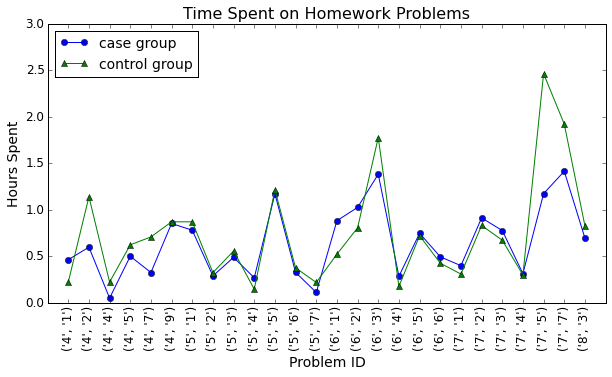

In [21]:
plt = fig_setting()
plot_hints(range(0,len(pros_time)), np.array(h_time)/3600., np.array(nh_time)/3600.)
plt.xticks(range(0,len(pros_time)), pros_time, rotation='vertical')
plt.title('Time Spent on Homework Problems')
plt.xlabel('Problem ID')
plt.ylabel('Hours Spent')
plt.xlim((-1, 26))
plt.ylim(ymax=3)
plt.legend(loc=2)
#plt.savefig('../graphs/new_times_analysis.png', bbox_inches='tight', pad_inches=0.2)

In [18]:
### Output table for latex
p_vals_tries, pros_tries, h_tries, nh_tries = fea_p_val('tries', hints_df_all, problem_list)

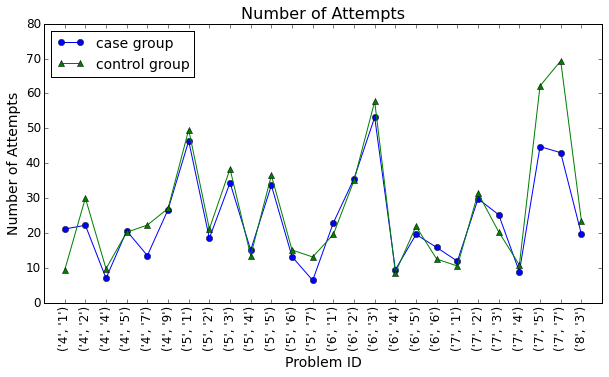

In [22]:
plt = fig_setting()
plot_hints(range(0,len(pros_tries)), h_tries, nh_tries)
plt.xticks(range(0,len(pros_tries)), pros_tries, rotation='vertical')
plt.title('Number of Attempts', fontsize=BIGGER_SIZE)
plt.ylim(ymax=80)
plt.xlim((-1, 26))
plt.xlabel('Problem ID')
plt.ylabel('Number of Attempts')
plt.legend(loc=2)
#plt.savefig('../graphs/new_tries_analysis.png', bbox_inches='tight', pad_inches=0.2)